# Decision Trees Implementation In Python for Titanic Dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [36]:
data = pd.read_csv("Dataset/Titanic.csv")

In [3]:
data.shape

(891, 25)

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
X= data.drop(["Survived"],axis=1)
Y=data["Survived"]

In [9]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, random_state=101, stratify=Y, test_size=0.25)

In [10]:
Y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [11]:
Y_test.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [15]:
dt_model = DecisionTreeClassifier()


In [16]:
dt_model.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:

dt_model.score(X_train,Y_train)


0.9880239520958084

In [18]:
dt_model.score(X_test,Y_test)

0.7443946188340808

In [19]:

dt_model.predict(X_test)


array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [20]:
Y_pred = dt_model.predict_proba(X_test)[:,1]

In [21]:
Y_new = []
for i in range(len(Y_pred)):
    if Y_pred[i]<=0.7:
        Y_new.append(0)
    else:
        Y_new.append(1)

In [23]:
accuracy_score(Y_test,Y_new)

0.7443946188340808

### Working With Different Depth


In [25]:
Train_Accuracy =[]
Test_Accuracy =[]
for depth in range(1,10):
    dt_model= DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train,Y_train)
    Train_Accuracy.append(dt_model.score(X_train,Y_train))
    Test_Accuracy.append(dt_model.score(X_test,Y_test))

In [27]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':Train_Accuracy, 'test_acc':Test_Accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300
5,6,0.863772,0.775785
6,7,0.889222,0.780269
7,8,0.911677,0.780269
8,9,0.929641,0.775785


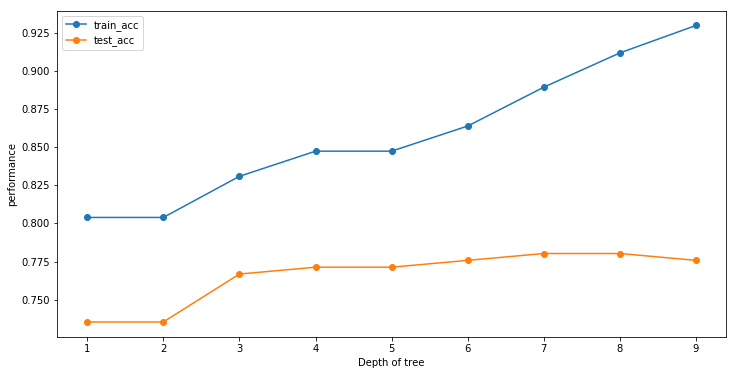

In [29]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [30]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25)

In [32]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
Y_pred = dt_model.predict_proba(X_test)[:,1]

In [34]:
Y_new = []
for i in range(len(Y_pred)):
    if Y_pred[i]<=0.7:
        Y_new.append(0)
    else:
        Y_new.append(1)

In [35]:
accuracy_score(Y_test,Y_new)

0.8026905829596412